In [1]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs

from rdkit.Chem import rdMolDescriptors

import numpy as np
import pandas as pd

In [2]:
data= pd.read_csv('smiles_list_177.txt')

In [3]:
data.shape

(177, 1)

In [4]:
data

,smiles
0,Cn1cncc1[C@](N)(c1ccc(Cl)cc1)c1ccc2c(c1)c(-c1c...
1,CNC(=O)c1cc(Oc2ccc(N[11C](=O)Nc3ccc(Cl)c(C(F)(...
2,CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ccc(O...
3,CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ccc(I...
4,CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ccc(O...
...,...
172,Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1
173,NC(=O)[C@H]1CCN(c2ncnc(N)c2F)C[C@@H]1N1CCC[C@@...
174,CCCS(=O)(=O)Nc1ccc(F)c(C(=O)c2c[nH]c3ncc(-c4cc...
175,Cc1[nH]c(/C=C2\C(=O)Nc3ccc(F)cc32)c(C)c1C(=O)N...


In [5]:
data['smiles'][0]

'Cn1cncc1[C@](N)(c1ccc(Cl)cc1)c1ccc2c(c1)c(-c1cccc(Cl)c1)cc(=O)n2C'

In [6]:
smiles_list=data['smiles']

In [7]:
smiles_list

0      Cn1cncc1[C@](N)(c1ccc(Cl)cc1)c1ccc2c(c1)c(-c1c...
1      CNC(=O)c1cc(Oc2ccc(N[11C](=O)Nc3ccc(Cl)c(C(F)(...
2      CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ccc(O...
3      CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ccc(I...
4      CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ccc(O...
                             ...                        
172               Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1
173    NC(=O)[C@H]1CCN(c2ncnc(N)c2F)C[C@@H]1N1CCC[C@@...
174    CCCS(=O)(=O)Nc1ccc(F)c(C(=O)c2c[nH]c3ncc(-c4cc...
175    Cc1[nH]c(/C=C2\C(=O)Nc3ccc(F)cc32)c(C)c1C(=O)N...
176    C=CC(=O)N1CCC([C@@H]2CCNc3c(C(N)=O)c(-c4ccc(Oc...
Name: smiles, Length: 177, dtype: object

In [8]:
smiles_list[0]

'Cn1cncc1[C@](N)(c1ccc(Cl)cc1)c1ccc2c(c1)c(-c1cccc(Cl)c1)cc(=O)n2C'

In [9]:
mol_list=[]
for smiles in smiles_list:
    mol=Chem.MolFromSmiles(smiles)
    mol_list.append(mol)

In [10]:
bi={}

In [11]:
type(mol_list)

list

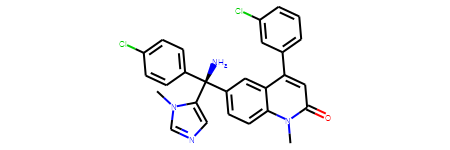

In [12]:
mol_list[0]

In [13]:
finger_list=[]
bi_list=[]
for structrue in mol_list:
    bi={}
    fp=AllChem.GetMorganFingerprintAsBitVect(structrue,2,nBits=1024,bitInfo=bi)
    fp_arr=np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp,fp_arr)
    np.nonzero(fp_arr)
    finger_list.append(list(fp.GetOnBits()))
    bi_list.append(bi)

In [14]:
type(fp.GetOnBits())

rdkit.rdBase._vectint

In [15]:
type(finger_list)

list

In [16]:
final_list=[]
for finger in finger_list:
    final_list.extend(finger)

In [17]:
final_list

[10,
 15,
 33,
 45,
 46,
 54,
 64,
 114,
 117,
 121,
 135,
 136,
 139,
 147,
 165,
 216,
 242,
 252,
 314,
 323,
 326,
 333,
 352,
 356,
 378,
 385,
 393,
 419,
 452,
 511,
 526,
 559,
 561,
 564,
 579,
 592,
 641,
 650,
 659,
 675,
 702,
 707,
 726,
 729,
 736,
 816,
 843,
 849,
 855,
 875,
 900,
 932,
 935,
 997,
 9,
 33,
 53,
 56,
 114,
 128,
 153,
 184,
 191,
 193,
 228,
 262,
 322,
 345,
 346,
 356,
 366,
 378,
 406,
 419,
 428,
 429,
 445,
 486,
 552,
 561,
 593,
 619,
 645,
 650,
 659,
 666,
 682,
 695,
 718,
 726,
 787,
 792,
 807,
 809,
 842,
 843,
 849,
 855,
 875,
 893,
 904,
 930,
 965,
 966,
 1019,
 8,
 33,
 36,
 74,
 80,
 90,
 96,
 107,
 128,
 142,
 161,
 197,
 251,
 252,
 253,
 281,
 294,
 314,
 322,
 352,
 356,
 388,
 466,
 486,
 512,
 527,
 571,
 586,
 590,
 620,
 624,
 633,
 650,
 667,
 692,
 694,
 695,
 698,
 718,
 721,
 726,
 753,
 781,
 807,
 840,
 841,
 849,
 875,
 881,
 893,
 927,
 932,
 948,
 957,
 958,
 966,
 1004,
 8,
 33,
 36,
 74,
 80,
 90,
 96,
 107,
 122,


In [18]:
from collections import Counter
counts =Counter(final_list)
print(counts)

Counter({356: 175, 849: 175, 726: 167, 378: 152, 33: 146, 650: 143, 128: 142, 875: 137, 428: 129, 807: 119, 926: 119, 935: 118, 893: 111, 80: 108, 695: 93, 904: 88, 1019: 78, 191: 75, 456: 73, 831: 72, 64: 71, 90: 71, 491: 70, 842: 68, 699: 66, 333: 62, 511: 61, 792: 61, 843: 59, 121: 58, 659: 53, 486: 53, 946: 53, 36: 52, 200: 52, 301: 51, 73: 50, 561: 48, 841: 48, 147: 45, 816: 44, 787: 44, 322: 43, 489: 43, 673: 42, 881: 41, 558: 41, 786: 40, 708: 40, 136: 39, 656: 39, 698: 38, 694: 37, 888: 37, 458: 37, 15: 36, 314: 36, 512: 36, 980: 36, 366: 34, 114: 33, 932: 33, 593: 33, 329: 32, 562: 32, 249: 32, 767: 32, 352: 31, 624: 31, 718: 30, 464: 30, 381: 30, 407: 29, 361: 29, 721: 28, 119: 28, 212: 28, 175: 28, 646: 28, 74: 27, 342: 27, 233: 27, 1: 27, 452: 26, 579: 26, 184: 26, 429: 26, 4: 26, 674: 26, 780: 26, 730: 25, 207: 25, 433: 25, 202: 25, 13: 25, 216: 24, 221: 24, 157: 24, 386: 24, 739: 24, 294: 23, 667: 23, 14: 23, 806: 23, 133: 23, 801: 23, 346: 22, 886: 22, 523: 22, 974: 22, 

In [19]:
#import sys
#sys.stdout = open('output.txt','w')
#print(counts)

In [20]:
Draw.DrawMorganBits(mol_list[0],45,bi[0])

KeyError: 0

In [ ]:
finger_list[0]

In [ ]:
mol_list[0]

In [ ]:
list(fp.GetOnBits())

In [ ]:

epinephrine = Chem.MolFromSmiles(smiles_list[0])
epinephrine

In [ ]:

bi = {}
fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(epinephrine, radius=2, bitInfo=bi)
# show 10 of the set bits:
list(fp.GetOnBits())[:10]

In [ ]:
Draw.DrawMorganBit(mol_list[0],54,bi_list[0])

In [ ]:
bi={}
fp=AllChem.GetMorganFingerprintAsBitVect(mol_list[0],2,nBits=1024,bitInfo=bi)
fp_arr=np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp,fp_arr)
np.nonzero(fp_arr)
finger=list(fp.GetOnBits())

In [ ]:
finger_list[0]